In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv(r'/content/drive/MyDrive/reviews_data_dump/reviews_badminton/data.csv')

In [4]:
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1


In [5]:
df.shape

(8518, 8)

In [6]:
df.describe

<bound method NDFrame.describe of                Reviewer Name               Review Title  \
0               Kamal Suresh               Nice product   
1          Flipkart Customer     Don't waste your money   
2     A. S. Raja Srinivasan   Did not meet expectations   
3        Suresh Narayanasamy                       Fair   
4                  ASHIK P A                Over priced   
...                      ...                        ...   
8513                     NaN                        NaN   
8514                     NaN                        NaN   
8515                     NaN                        NaN   
8516                     NaN                        NaN   
8517                     NaN                        NaN   

                  Place of Review  Up Votes  Down Votes     Month  \
0      Certified Buyer, Chirakkal     889.0        64.0  Feb 2021   
1      Certified Buyer, Hyderabad     109.0         6.0  Feb 2021   
2     Certified Buyer, Dharmapuri      42.0         3.0  Apr 2021   
3        Certified Buyer, Chennai      25.0         1.0       NaN   
4                             NaN     147.0        24.0  Apr 2016   
...                           ...       ...         ...       ...   
8513                          NaN       NaN         NaN       NaN   
8514                          NaN       NaN         NaN       NaN   
8515                          NaN       NaN         NaN       NaN   
8516                          NaN       NaN         NaN       NaN   
8517                          NaN       NaN         NaN       NaN   

                                            Review text  Ratings  
0     Nice product, good quality, but price is now r...        4  
1     They didn't supplied Yonex Mavis 350. Outside ...        1  
2     Worst product. Damaged shuttlecocks packed in ...        1  
3     Quite O. K. , but nowadays  the quality of the...        3  
4     Over pricedJust â?¹620 ..from retailer.I didn'...        1  
...                                                 ...      ...  
8513                                                NaN        5  
8514                                                NaN        2  
8515                                                NaN        4  
8516                                                NaN        1  
8517                                                NaN        4  

[8518 rows x 8 columns]>

In [7]:
df.columns

Index(['Reviewer Name', 'Review Title', 'Place of Review', 'Up Votes',
       'Down Votes', 'Month', 'Review text', 'Ratings'],
      dtype='object')

In [8]:
df.columns = df.columns.str.strip()

df.columns

Index(['Reviewer Name', 'Review Title', 'Place of Review', 'Up Votes',
       'Down Votes', 'Month', 'Review text', 'Ratings'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8468 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8518 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 532.5+ KB


In [10]:
print(df.isnull().sum())

Reviewer Name       10
Review Title        10
Place of Review     50
Up Votes            10
Down Votes          10
Month              465
Review text          8
Ratings              0
dtype: int64


In [11]:
df.fillna({'Reviewer Name': 'Anonymous',
           'Review Title': 'No Title',
           'Place of Review': 'Unknown',
           'Up Votes': df['Up Votes'].median(),
           'Down Votes': df['Down Votes'].median(),
           'Month': 'Unknown'},
          inplace=True)

In [12]:
print(df.isnull().sum())

Reviewer Name      0
Review Title       0
Place of Review    0
Up Votes           0
Down Votes         0
Month              0
Review text        8
Ratings            0
dtype: int64


In [13]:
df['Month'] = pd.to_datetime(df['Month'], errors='coerce')

In [14]:
df['Up Votes'] = df['Up Votes'].astype(int)
df['Down Votes'] = df['Down Votes'].astype(int)

In [15]:
df.columns = df.columns.str.replace(' ', '_')

# Check the updated data types and column names
print(df.dtypes)
print(df.columns)

Reviewer_Name              object
Review_Title               object
Place_of_Review            object
Up_Votes                    int64
Down_Votes                  int64
Month              datetime64[ns]
Review_text                object
Ratings                     int64
dtype: object
Index(['Reviewer_Name', 'Review_Title', 'Place_of_Review', 'Up_Votes',
       'Down_Votes', 'Month', 'Review_text', 'Ratings'],
      dtype='object')


In [16]:
print(df.describe())

          Up_Votes   Down_Votes      Ratings
count  8518.000000  8518.000000  8518.000000
mean      0.390937     0.121625     4.181028
std      11.607097     3.246117     1.262200
min       0.000000     0.000000     1.000000
25%       0.000000     0.000000     4.000000
50%       0.000000     0.000000     5.000000
75%       0.000000     0.000000     5.000000
max     889.000000   219.000000     5.000000


In [17]:
print(df['Ratings'].value_counts())

5    5080
4    1746
1     769
3     615
2     308
Name: Ratings, dtype: int64


In [18]:
pip install textblob

In [19]:
pip install nltk --no-warn-script-location


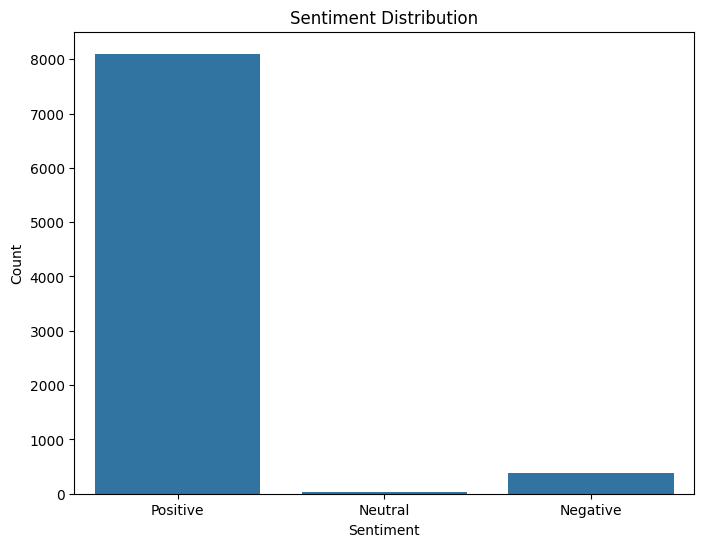

In [20]:
from textblob import TextBlob

def get_sentiment(text):
    try:
        analysis = TextBlob(str(text))
        if analysis.sentiment.polarity > 0:
            return 'Positive'
        elif analysis.sentiment.polarity < 0:
            return 'Negative'
        else:
            return 'Neutral'
    except:
        return 'Unknown'

# Apply sentiment analysis to the 'Review Text' column
df['Sentiment'] = df['Review_text'].apply(get_sentiment)

# Visualize sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=df)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [21]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download NLTK resources
nltk.download('vader_lexicon')

# Initialize the Sentiment Intensity Analyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [22]:
def get_sentiment_nltk(text):
    # Check if the text is not NaN
    if isinstance(text, str):
        scores = sid.polarity_scores(text)
        if scores['compound'] > 0:
            return 'Positive'
        elif scores['compound'] < 0:
            return 'Negative'
        else:
            return 'Neutral'
    else:
        return 'Neutral'

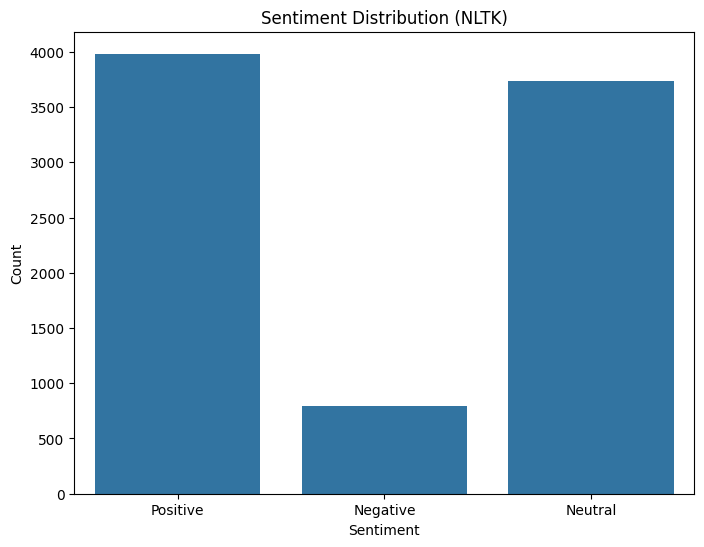

In [23]:
df['Sentiment_NLTK'] = df['Review_text'].apply(get_sentiment_nltk)

# Visualize sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment_NLTK', data=df)
plt.title('Sentiment Distribution (NLTK)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [24]:
df['Sentiment_NLTK'].value_counts(normalize=True)

Positive    0.467598
Neutral     0.438835
Negative    0.093567
Name: Sentiment_NLTK, dtype: float64

In [25]:
df = df[df.Sentiment_NLTK != "Neutral"]

df.shape

(4780, 10)

In [26]:
df['Sentiment_NLTK'].value_counts(normalize=True)

Positive    0.833264
Negative    0.166736
Name: Sentiment_NLTK, dtype: float64

In [27]:
# Define a dictionary to map sentiment categories to numerical values
sentiment_mapping = {'Positive': 1, 'Negative': 0}

# Map sentiment categories to numerical values in the 'Sentiment_NLTK' column
df['Sentiment_NLTK_numeric'] = df['Sentiment_NLTK'].map(sentiment_mapping)

# Display the updated DataFrame
print(df[['Sentiment_NLTK', 'Sentiment_NLTK_numeric']].head())

  Sentiment_NLTK  Sentiment_NLTK_numeric
0       Positive                       1
1       Negative                       0
2       Negative                       0
3       Positive                       1
4       Positive                       1


<ipython-input-27-3d3b31bbc879>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment_NLTK_numeric'] = df['Sentiment_NLTK'].map(sentiment_mapping)


In [28]:
df.loc[0, 'Review_text']

'Nice product, good quality, but price is now rising which is a bad sign. 800-850 was an affordable price, especially when we play everyday. So kindly help us out in terms of the price. Thank You.READ MORE'

In [29]:
df = df[["Review_text", "Sentiment_NLTK_numeric"]]
df.shape

(4780, 2)

In [30]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline

In [31]:

import warnings

warnings.filterwarnings('ignore')

In [32]:
X = df.Review_text # the column text contains textual data to extract features from
y = df.Sentiment_NLTK_numeric

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

print(X_train.shape, X_test.shape)

(3585,) (1195,)


In [35]:
pip install mlflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.6/147.6 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packa

In [41]:
#  Data Preprocessing on train data (X_train)

import string

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialize WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

In [42]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [43]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [44]:
def clean(doc): # doc is a string of text
    # This text contains a lot of <br/> tags.
    doc = doc.replace("</br>", " ")

    # Remove punctuation and numbers.
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])

    # Converting to lower case
    doc = doc.lower()

    # Tokenization
    tokens = nltk.word_tokenize(doc)

    # Lemmatize
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Stop word removal
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in lemmatized_tokens if word.lower() not in stop_words]

    # Join and return
    return " ".join(filtered_tokens)

In [45]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [46]:
# import feature extraction methods from sklearn
from sklearn.feature_extraction.text import CountVectorizer

# instantiate a vectorizer
vect = CountVectorizer(preprocessor=clean)

# use it to extract features from training data
%time X_train_dtm = vect.fit_transform(X_train)

print(X_train_dtm.shape)

CPU times: user 2.69 s, sys: 139 ms, total: 2.83 s
Wall time: 2.85 s
(3585, 2531)


In [47]:
# Step 4: Data Preprocessing on test data (X_test)

# transform testing data (using training data's features)
X_test_dtm = vect.transform(X_test)

print(X_test_dtm.shape)

(1195, 2531)


In [48]:
# Step 5: Building a Model (i.e. Train the classifier)

# import classifiers from sklearn
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB() # instantiate a Multinomial Naive Bayes model
%time nb.fit(X_train_dtm, y_train) # train the model(timing it with an IPython "magic command")

CPU times: user 7.95 ms, sys: 11 µs, total: 7.96 ms
Wall time: 19.2 ms


MultinomialNB()

In [49]:
# Step 6: Evaluate on train data

from sklearn import metrics
# make class predictions for X_train_dtm
y_train_pred = nb.predict(X_train_dtm)

metrics.accuracy_score(y_train, y_train_pred)

0.9603905160390516

In [50]:
metrics.confusion_matrix(y_train, y_train_pred)

array([[ 516,  101],
       [  41, 2927]])

In [36]:
import mlflow

mlflow.set_experiment("FSA")

2024/03/27 05:54:51 INFO mlflow.tracking.fluent: Experiment with name 'FSA' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///content/mlruns/782720422749226292', creation_time=1711518891296, experiment_id='782720422749226292', last_update_time=1711518891296, lifecycle_stage='active', name='FSA', tags={}>

In [38]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [51]:
pipe = Pipeline(
    [
        ('vectorization', CountVectorizer()),
        ('nb', MultinomialNB())
    ]
)

MAX_FEATURES = [1000, 1500, 2000]
ALPHA = [1, 10]

# Observe the Key Value Pair format
parameter_grid = [{'vectorization__preprocessor' : [clean],
                   'vectorization__max_features' : MAX_FEATURES,
                   'nb__alpha' : ALPHA}]

In [53]:
clf = GridSearchCV(
    estimator=pipe,
    param_grid=parameter_grid,
    scoring='f1',
    cv=5,
    return_train_score=True,
    verbose=1
)

mlflow.sklearn.autolog(max_tuning_runs=None)

with mlflow.start_run() as run:
    %time clf.fit(X_train, y_train)

2024/03/27 06:02:52 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


Fitting 5 folds for each of 6 candidates, totalling 30 fits


2024/03/27 06:04:23 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmpnqs46wc4/model/model.pkl, flavor: sklearn). Fall back to return ['scikit-learn==1.2.2', 'cloudpickle==2.2.1']. Set logging level to DEBUG to see the full traceback. 


CPU times: user 1min 19s, sys: 5.86 s, total: 1min 25s
Wall time: 1min 33s


In [55]:
pipelines = {
    'naive_bayes': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', MultinomialNB())
    ]),
    'decision_tree': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', DecisionTreeClassifier())
    ]),
    'logistic_regression': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', LogisticRegression())
    ])
}

# Define parameter grid for each algorithm
param_grids = {
    'naive_bayes': [
        {
            'vectorization': [CountVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__alpha' : [1, 10]
        }
    ],
    'decision_tree': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__max_depth': [None, 5, 10]
        }
    ],
    'logistic_regression': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__C': [0.1, 1, 10],
            'classifier__penalty': ['elasticnet'],
            'classifier__l1_ratio': [0.4, 0.5, 0.6],
            'classifier__solver': ['saga'],
            'classifier__class_weight': ['balanced']
        }
    ]
}


In [57]:
best_models = {}

for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algo],
                               param_grid=param_grids[algo],
                               cv=5,
                               scoring='f1',
                               return_train_score=True,
                               verbose=1
                              )
    mlflow.sklearn.autolog(max_tuning_runs=None)

    with mlflow.start_run() as run:
        %time grid_search.fit(X_train, y_train)

    print('Train Score: ', grid_search.best_score_)
    print('Test Score: ', grid_search.score(X_test, y_test))

    best_models[algo] = grid_search.best_estimator_
    print()

2024/03/27 06:06:59 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


********** naive_bayes **********
Fitting 5 folds for each of 8 candidates, totalling 40 fits
CPU times: user 6.77 s, sys: 434 ms, total: 7.21 s
Wall time: 12.3 s
Train Score:  0.9569378387173026
Test Score:  0.9661266568483063

********** decision_tree **********


2024/03/27 06:07:12 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


Fitting 5 folds for each of 24 candidates, totalling 120 fits


2024/03/27 06:07:43 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


CPU times: user 20.8 s, sys: 979 ms, total: 21.8 s
Wall time: 30.3 s
Train Score:  0.9653094520401184
Test Score:  0.9691025012260912

********** logistic_regression **********
Fitting 5 folds for each of 72 candidates, totalling 360 fits
CPU times: user 5min 31s, sys: 2.01 s, total: 5min 33s
Wall time: 5min 40s
Train Score:  0.9723478899736264
Test Score:  0.9766749379652605



In [58]:
mlflow.sklearn.autolog(disable=True)

In [59]:

import time
import joblib
import os

In [60]:
dev = "vinay dussa"
best_models = {}

for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algo],
                               param_grid=param_grids[algo],
                               cv=5,
                               scoring='accuracy',
                               return_train_score=True,
                               verbose=1
                              )

    # Fit
    start_fit_time = time.time()
    grid_search.fit(X_train, y_train)
    end_fit_time = time.time()

    # Predict
    start_predict_time = time.time()
    y_pred = grid_search.predict(X_test)
    end_predict_time = time.time()

    # Saving the best model
    joblib.dump(grid_search.best_estimator_, f'/content/drive/MyDrive/reviews_data_dump/reviews_badminton/{algo}.pkl')
    model_size = os.path.getsize(f'/content/drive/MyDrive/reviews_data_dump/reviews_badminton/{algo}.pkl')

    # Pring Log
    print('Train Score: ', grid_search.best_score_)
    print('Test Score: ', grid_search.score(X_test, y_test))
    print("Fit Time: ", end_fit_time - start_fit_time)
    print("Predict Time: ", end_predict_time - start_predict_time)
    print("Model Size: ", model_size)

    print()

    # Start the experiment run
    with mlflow.start_run() as run:
        # Log tags with mlflow.set_tag()
        mlflow.set_tag("developer", dev)

        # Log Parameters with mlflow.log_param()
        mlflow.log_param("algorithm", algo)
        mlflow.log_param("hyperparameter_grid", param_grids[algo])
        mlflow.log_param("best_hyperparameter", grid_search.best_params_)

        # Log Metrics with mlflow.log_metric()
        mlflow.log_metric("train_score", grid_search.best_score_)
        mlflow.log_metric("test_score", grid_search.score(X_test, y_test))
        mlflow.log_metric("fit_time", end_fit_time - start_fit_time)
        mlflow.log_metric("predict_time", end_predict_time - start_predict_time)
        mlflow.log_metric("model_size", model_size)

        # Log Model using mlflow.sklearn.log_model()
        mlflow.sklearn.log_model(grid_search.best_estimator_, f"{algo}_model")


********** naive_bayes **********
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Train Score:  0.9280334728033474
Test Score:  0.9422594142259414
Fit Time:  3.244326591491699
Predict Time:  0.012213706970214844
Model Size:  111610

********** decision_tree **********
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Train Score:  0.9430962343096235
Test Score:  0.9472803347280335
Fit Time:  16.123241186141968
Predict Time:  0.020824193954467773
Model Size:  81948

********** logistic_regression **********
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Train Score:  0.9539748953974895
Test Score:  0.9615062761506277
Fit Time:  328.5371022224426
Predict Time:  0.013021230697631836
Model Size:  93981

